In [53]:
from scipy.stats import skew, kurtosis
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import pandas as pd

In [54]:
df = pd.read_csv("./data/icici_04-18_clean.csv")
df_test = pd.read_csv("../data/ICICIBANK.NS_test.csv")

In [55]:
df = df['Close'][:-11].values
df_test = df_test['Close'][0:-10].values

In [56]:
stock_prices = np.reshape(df, (-1,15))
stock_prices_test = np.reshape(df_test, (-1,15))

In [57]:
stock_prices_test[stock_prices_test == 'null'] = '349.3994'

In [58]:
stock_prices_test = stock_prices_test.astype(float)

In [59]:
stock_prices_test

array([[ 349.3994  ,  349.399994,  345.700012,  355.      ,  353.700012,
         354.450012,  349.649994,  353.100006,  355.899994,  356.850006,
         352.350006,  360.899994,  366.600006,  370.      ,  367.549988],
       [ 362.399994,  357.899994,  356.75    ,  352.049988,  356.350006,
         354.649994,  359.      ,  362.200012,  355.149994,  355.5     ,
         357.950012,  351.399994,  347.649994,  352.200012,  346.350006],
       [ 342.799988,  349.950012,  349.549988,  351.899994,  358.450012,
         362.25    ,  366.5     ,  362.149994,  354.200012,  352.75    ,
         355.850006,  355.649994,  360.75    ,  360.149994,  363.75    ],
       [ 364.600006,  363.25    ,  365.200012,  367.700012,  380.149994,
         382.25    ,  379.5     ,  378.549988,  373.350006,  372.75    ,
         375.299988,  374.600006,  372.      ,  371.700012,  369.049988],
       [ 367.399994,  364.799988,  357.200012,  343.549988,  346.850006,
         365.899994,  364.450012,  354.649994, 

In [60]:
print(stock_prices.shape, stock_prices_test.shape)

(236, 15) (5, 15)


In [61]:
def calc_features(a):
    Feature_array = []
    for row in range(0,a.shape[0]):
        mean = np.mean(a[row])
        f = np.array([mean])
        skewness = skew(a[row], axis=0, bias=True)
        f = np.append(f, skewness)
        kurt = kurtosis(a[row], axis=0, fisher=True, bias=True)
        f= np.append(f, kurt)
        variance = np.var(a[row])
        f = np.append(f, variance)
        std = np.std(a[row])
        f = np.append(f, std)
        x = np.arange(0,len(a[row]),1)
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,a[row])
        f = np.append(f, slope)
        df = pd.DataFrame({'A' : a[row]})
        f = np.append(f,df.ewm(alpha = 0.6).mean().iloc[-1,0])
        print(f)
        Feature_array.append(f)
    
    return np.asarray(Feature_array)

In [62]:
Feature_array = calc_features(stock_prices)

[ 55.7139404   -0.42472165  -1.37625384   3.88195426   1.97026756
   0.41292361  57.30775999]
[ 60.5212132    0.60270984  -0.6539037    4.70586624   2.16930086
   0.36763066  64.36084744]
[ 66.20545347   0.85109782   0.35636554   0.5594852    0.74798743
   0.1052236   67.58095622]
[ 65.4527212    0.15729158  -1.48690058   3.10783355   1.76290486
  -0.34555069  63.95940928]
[ 64.61696667  -0.35058391  -1.2837317    3.57105194   1.88972271
   0.32960962  66.37221739]
[  6.85036319e+01   5.31851878e-01   3.22926102e-02   9.74307676e-01
   9.87070249e-01  -2.72696429e-03   6.96789425e+01]
[  7.20260594e+01   2.89112067e-01  -2.86775967e-01   2.09600144e+00
   1.44775738e+00   5.37657571e-02   7.16883334e+01]
[ 73.45030613   0.21556152  -0.86586285   5.08684507   2.25540353
   0.23295318  73.73553673]
[ 69.20120687   0.31364657  -0.60789967   6.67722384   2.58403248
  -0.30873505  68.27759177]
[ 71.83212027  -0.89953938   0.82225455   0.77796692   0.88202433
   0.15798812  72.57273626]
[ 74

[  2.11854801e+02   1.08133097e-01  -8.92265310e-01   3.04753266e+01
   5.52044623e+00  -4.70417632e-01   2.14532132e+02]
[  2.02537467e+02  -8.53102591e-01   6.55947527e-01   1.64939059e+01
   4.06126900e+00   1.92018093e-01   2.04426162e+02]
[  1.94992732e+02   1.28533470e-01  -1.47067601e+00   8.48409140e+01
   9.21091277e+00  -1.89562135e+00   1.83405497e+02]
[  1.85290867e+02   1.86509726e-02   6.79171050e-02   3.35884458e+01
   5.79555397e+00  -9.15367293e-01   1.75766657e+02]
[  1.83578135e+02  -3.36457258e-01  -1.28715963e+00   4.17397840e+01
   6.46063340e+00  -4.13537143e-02   1.82899826e+02]
[  1.84600802e+02   5.61114889e-01  -3.94785057e-01   4.72867651e+00
   2.17455203e+00  -5.41497679e-02   1.86609210e+02]
[ 200.4254008    -1.62193259    3.66509417    8.35165714    2.88992338
    0.33152124  201.3766206 ]
[ 198.76906433   -0.97415055    0.2268571    21.21370499    4.6058338
   -0.56726056  195.84021556]
[  1.90153935e+02  -9.99683840e-02  -1.33604277e+00   1.93770475e+0

[ 225.80306693    1.65511711    2.03873336   57.79978537    7.60261701
   -0.74172112  227.88362487]
[ 235.4757334     0.56874679   -1.10585628   97.33031916    9.86561296
    1.96297908  249.65825241]
[ 241.20613287   -0.66863432   -0.83469371   47.46917137    6.88978747
   -1.23489594  231.79453699]
[  2.39384933e+02   1.73109789e-01  -1.22416122e+00   1.84748898e+02
   1.35922367e+01   2.52211778e+00   2.55817873e+02]
[ 250.21219787    0.60018372   -0.35343056   47.1024573     6.863123
   -0.58168571  241.91185421]
[  2.37269734e+02   3.28374999e-01  -1.69396937e-01   9.68453036e+00
   3.11199781e+00   1.32939261e-01   2.41503908e+02]
[ 232.26073393    0.65400252   -0.64384206   19.23578927    4.38586243
   -0.80892487  230.67676459]
[ 238.3121338    -0.34459522   -1.30852748   33.62170593    5.79842271
    1.18164668  241.58979865]
[ 251.34546613   -0.63040095   -1.00120513   98.3844582     9.918894
    1.91881826  256.61017015]
[  2.54948467e+02   1.96961217e-01  -1.38691926e+00  

In [63]:
Feature_array_test = calc_features(stock_prices_test)

[ 356.03662827    0.68664985   -0.58634505   48.69665571    6.97829891
    1.3776931   367.4387759 ]
[  3.55166667e+02  -2.86235054e-01  -5.26353963e-01   2.01949002e+01
   4.49387363e+00  -6.85713536e-01   3.48351559e+02]
[ 356.44333293   -0.38642772   -0.48265043   38.21597391    6.18190698
    0.85625011  362.0729672 ]
[  3.72663334e+02  -3.38882100e-02  -1.05495545e+00   3.25944493e+01
   5.70915486e+00   3.70535179e-01   3.70327737e+02]
[  3.55959996e+02  -1.08278900e-01  -1.03380542e+00   5.48744228e+01
   7.40772723e+00  -7.11964736e-01   3.47596613e+02]


In [64]:
Feature_array_test.shape

(5, 7)

In [65]:
rows = Feature_array.shape[1]
# encoding = np.random.rand(rows,15)
encoding = np.ones((rows,15))

In [66]:
encoding

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.]])

In [67]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    numIterations = int(numIterations)
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    return theta

In [68]:
lr = 1e-7
n_iter = 1e5

theta = encoding
y = stock_prices
m = y.shape[0]

# theta, cost_history = gradient_descent(Feature_array,y,theta,lr,n_iter)
theta = gradientDescent(Feature_array,y,theta,lr,m,n_iter)

Iteration 0 | Cost: 530205.091547
Iteration 1 | Cost: 521299.643159
Iteration 2 | Cost: 512548.763919
Iteration 3 | Cost: 503949.768234
Iteration 4 | Cost: 495500.017175
Iteration 5 | Cost: 487196.917665
Iteration 6 | Cost: 479037.921680
Iteration 7 | Cost: 471020.525473
Iteration 8 | Cost: 463142.268797
Iteration 9 | Cost: 455400.734154
Iteration 10 | Cost: 447793.546049
Iteration 11 | Cost: 440318.370265
Iteration 12 | Cost: 432972.913138
Iteration 13 | Cost: 425754.920862
Iteration 14 | Cost: 418662.178788
Iteration 15 | Cost: 411692.510749
Iteration 16 | Cost: 404843.778388
Iteration 17 | Cost: 398113.880504
Iteration 18 | Cost: 391500.752404
Iteration 19 | Cost: 385002.365270
Iteration 20 | Cost: 378616.725535
Iteration 21 | Cost: 372341.874271
Iteration 22 | Cost: 366175.886586
Iteration 23 | Cost: 360116.871036
Iteration 24 | Cost: 354162.969038
Iteration 25 | Cost: 348312.354306
Iteration 26 | Cost: 342563.232282
Iteration 27 | Cost: 336913.839592
Iteration 28 | Cost: 331362.44

Iteration 1914 | Cost: 6628.284149
Iteration 1915 | Cost: 6624.883301
Iteration 1916 | Cost: 6621.484342
Iteration 1917 | Cost: 6618.087270
Iteration 1918 | Cost: 6614.692084
Iteration 1919 | Cost: 6611.298782
Iteration 1920 | Cost: 6607.907365
Iteration 1921 | Cost: 6604.517831
Iteration 1922 | Cost: 6601.130179
Iteration 1923 | Cost: 6597.744408
Iteration 1924 | Cost: 6594.360516
Iteration 1925 | Cost: 6590.978504
Iteration 1926 | Cost: 6587.598369
Iteration 1927 | Cost: 6584.220111
Iteration 1928 | Cost: 6580.843728
Iteration 1929 | Cost: 6577.469220
Iteration 1930 | Cost: 6574.096586
Iteration 1931 | Cost: 6570.725824
Iteration 1932 | Cost: 6567.356933
Iteration 1933 | Cost: 6563.989914
Iteration 1934 | Cost: 6560.624763
Iteration 1935 | Cost: 6557.261481
Iteration 1936 | Cost: 6553.900066
Iteration 1937 | Cost: 6550.540518
Iteration 1938 | Cost: 6547.182835
Iteration 1939 | Cost: 6543.827016
Iteration 1940 | Cost: 6540.473060
Iteration 1941 | Cost: 6537.120966
Iteration 1942 | Cos

Iteration 3827 | Cost: 2619.617141
Iteration 3828 | Cost: 2618.441225
Iteration 3829 | Cost: 2617.265961
Iteration 3830 | Cost: 2616.091349
Iteration 3831 | Cost: 2614.917389
Iteration 3832 | Cost: 2613.744079
Iteration 3833 | Cost: 2612.571421
Iteration 3834 | Cost: 2611.399412
Iteration 3835 | Cost: 2610.228054
Iteration 3836 | Cost: 2609.057346
Iteration 3837 | Cost: 2607.887287
Iteration 3838 | Cost: 2606.717877
Iteration 3839 | Cost: 2605.549115
Iteration 3840 | Cost: 2604.381002
Iteration 3841 | Cost: 2603.213536
Iteration 3842 | Cost: 2602.046719
Iteration 3843 | Cost: 2600.880548
Iteration 3844 | Cost: 2599.715024
Iteration 3845 | Cost: 2598.550147
Iteration 3846 | Cost: 2597.385915
Iteration 3847 | Cost: 2596.222330
Iteration 3848 | Cost: 2595.059389
Iteration 3849 | Cost: 2593.897094
Iteration 3850 | Cost: 2592.735444
Iteration 3851 | Cost: 2591.574437
Iteration 3852 | Cost: 2590.414075
Iteration 3853 | Cost: 2589.254356
Iteration 3854 | Cost: 2588.095281
Iteration 3855 | Cos

Iteration 5847 | Cost: 1190.324453
Iteration 5848 | Cost: 1189.940488
Iteration 5849 | Cost: 1189.556736
Iteration 5850 | Cost: 1189.173196
Iteration 5851 | Cost: 1188.789868
Iteration 5852 | Cost: 1188.406752
Iteration 5853 | Cost: 1188.023848
Iteration 5854 | Cost: 1187.641156
Iteration 5855 | Cost: 1187.258675
Iteration 5856 | Cost: 1186.876406
Iteration 5857 | Cost: 1186.494348
Iteration 5858 | Cost: 1186.112501
Iteration 5859 | Cost: 1185.730865
Iteration 5860 | Cost: 1185.349440
Iteration 5861 | Cost: 1184.968227
Iteration 5862 | Cost: 1184.587223
Iteration 5863 | Cost: 1184.206431
Iteration 5864 | Cost: 1183.825849
Iteration 5865 | Cost: 1183.445478
Iteration 5866 | Cost: 1183.065317
Iteration 5867 | Cost: 1182.685366
Iteration 5868 | Cost: 1182.305625
Iteration 5869 | Cost: 1181.926094
Iteration 5870 | Cost: 1181.546772
Iteration 5871 | Cost: 1181.167661
Iteration 5872 | Cost: 1180.788759
Iteration 5873 | Cost: 1180.410067
Iteration 5874 | Cost: 1180.031584
Iteration 5875 | Cos

Iteration 7402 | Cost: 789.507442
Iteration 7403 | Cost: 789.344579
Iteration 7404 | Cost: 789.181805
Iteration 7405 | Cost: 789.019121
Iteration 7406 | Cost: 788.856526
Iteration 7407 | Cost: 788.694020
Iteration 7408 | Cost: 788.531604
Iteration 7409 | Cost: 788.369277
Iteration 7410 | Cost: 788.207039
Iteration 7411 | Cost: 788.044890
Iteration 7412 | Cost: 787.882830
Iteration 7413 | Cost: 787.720860
Iteration 7414 | Cost: 787.558978
Iteration 7415 | Cost: 787.397185
Iteration 7416 | Cost: 787.235481
Iteration 7417 | Cost: 787.073866
Iteration 7418 | Cost: 786.912340
Iteration 7419 | Cost: 786.750902
Iteration 7420 | Cost: 786.589553
Iteration 7421 | Cost: 786.428293
Iteration 7422 | Cost: 786.267121
Iteration 7423 | Cost: 786.106038
Iteration 7424 | Cost: 785.945043
Iteration 7425 | Cost: 785.784137
Iteration 7426 | Cost: 785.623319
Iteration 7427 | Cost: 785.462590
Iteration 7428 | Cost: 785.301949
Iteration 7429 | Cost: 785.141396
Iteration 7430 | Cost: 784.980931
Iteration 7431

Iteration 9024 | Cost: 614.383903
Iteration 9025 | Cost: 614.316712
Iteration 9026 | Cost: 614.249557
Iteration 9027 | Cost: 614.182438
Iteration 9028 | Cost: 614.115356
Iteration 9029 | Cost: 614.048310
Iteration 9030 | Cost: 613.981300
Iteration 9031 | Cost: 613.914327
Iteration 9032 | Cost: 613.847389
Iteration 9033 | Cost: 613.780488
Iteration 9034 | Cost: 613.713623
Iteration 9035 | Cost: 613.646795
Iteration 9036 | Cost: 613.580002
Iteration 9037 | Cost: 613.513246
Iteration 9038 | Cost: 613.446525
Iteration 9039 | Cost: 613.379841
Iteration 9040 | Cost: 613.313192
Iteration 9041 | Cost: 613.246580
Iteration 9042 | Cost: 613.180004
Iteration 9043 | Cost: 613.113464
Iteration 9044 | Cost: 613.046959
Iteration 9045 | Cost: 612.980491
Iteration 9046 | Cost: 612.914059
Iteration 9047 | Cost: 612.847662
Iteration 9048 | Cost: 612.781302
Iteration 9049 | Cost: 612.714977
Iteration 9050 | Cost: 612.648688
Iteration 9051 | Cost: 612.582435
Iteration 9052 | Cost: 612.516218
Iteration 9053

Iteration 10512 | Cost: 545.495794
Iteration 10513 | Cost: 545.465406
Iteration 10514 | Cost: 545.435033
Iteration 10515 | Cost: 545.404677
Iteration 10516 | Cost: 545.374336
Iteration 10517 | Cost: 545.344011
Iteration 10518 | Cost: 545.313703
Iteration 10519 | Cost: 545.283410
Iteration 10520 | Cost: 545.253132
Iteration 10521 | Cost: 545.222871
Iteration 10522 | Cost: 545.192626
Iteration 10523 | Cost: 545.162396
Iteration 10524 | Cost: 545.132182
Iteration 10525 | Cost: 545.101984
Iteration 10526 | Cost: 545.071802
Iteration 10527 | Cost: 545.041635
Iteration 10528 | Cost: 545.011485
Iteration 10529 | Cost: 544.981350
Iteration 10530 | Cost: 544.951230
Iteration 10531 | Cost: 544.921127
Iteration 10532 | Cost: 544.891039
Iteration 10533 | Cost: 544.860967
Iteration 10534 | Cost: 544.830911
Iteration 10535 | Cost: 544.800871
Iteration 10536 | Cost: 544.770846
Iteration 10537 | Cost: 544.740837
Iteration 10538 | Cost: 544.710843
Iteration 10539 | Cost: 544.680866
Iteration 10540 | Co

Iteration 12384 | Cost: 508.878981
Iteration 12385 | Cost: 508.867108
Iteration 12386 | Cost: 508.855241
Iteration 12387 | Cost: 508.843380
Iteration 12388 | Cost: 508.831524
Iteration 12389 | Cost: 508.819674
Iteration 12390 | Cost: 508.807829
Iteration 12391 | Cost: 508.795990
Iteration 12392 | Cost: 508.784157
Iteration 12393 | Cost: 508.772329
Iteration 12394 | Cost: 508.760507
Iteration 12395 | Cost: 508.748691
Iteration 12396 | Cost: 508.736880
Iteration 12397 | Cost: 508.725074
Iteration 12398 | Cost: 508.713275
Iteration 12399 | Cost: 508.701481
Iteration 12400 | Cost: 508.689692
Iteration 12401 | Cost: 508.677909
Iteration 12402 | Cost: 508.666132
Iteration 12403 | Cost: 508.654360
Iteration 12404 | Cost: 508.642593
Iteration 12405 | Cost: 508.630833
Iteration 12406 | Cost: 508.619077
Iteration 12407 | Cost: 508.607328
Iteration 12408 | Cost: 508.595584
Iteration 12409 | Cost: 508.583845
Iteration 12410 | Cost: 508.572112
Iteration 12411 | Cost: 508.560385
Iteration 12412 | Co

Iteration 14411 | Cost: 493.027108
Iteration 14412 | Cost: 493.022088
Iteration 14413 | Cost: 493.017069
Iteration 14414 | Cost: 493.012052
Iteration 14415 | Cost: 493.007036
Iteration 14416 | Cost: 493.002023
Iteration 14417 | Cost: 492.997011
Iteration 14418 | Cost: 492.992002
Iteration 14419 | Cost: 492.986994
Iteration 14420 | Cost: 492.981988
Iteration 14421 | Cost: 492.976983
Iteration 14422 | Cost: 492.971981
Iteration 14423 | Cost: 492.966980
Iteration 14424 | Cost: 492.961981
Iteration 14425 | Cost: 492.956984
Iteration 14426 | Cost: 492.951989
Iteration 14427 | Cost: 492.946996
Iteration 14428 | Cost: 492.942004
Iteration 14429 | Cost: 492.937014
Iteration 14430 | Cost: 492.932026
Iteration 14431 | Cost: 492.927040
Iteration 14432 | Cost: 492.922056
Iteration 14433 | Cost: 492.917074
Iteration 14434 | Cost: 492.912093
Iteration 14435 | Cost: 492.907114
Iteration 14436 | Cost: 492.902137
Iteration 14437 | Cost: 492.897162
Iteration 14438 | Cost: 492.892188
Iteration 14439 | Co

Iteration 16305 | Cost: 485.903333
Iteration 16306 | Cost: 485.900465
Iteration 16307 | Cost: 485.897598
Iteration 16308 | Cost: 485.894731
Iteration 16309 | Cost: 485.891865
Iteration 16310 | Cost: 485.888999
Iteration 16311 | Cost: 485.886134
Iteration 16312 | Cost: 485.883270
Iteration 16313 | Cost: 485.880407
Iteration 16314 | Cost: 485.877544
Iteration 16315 | Cost: 485.874681
Iteration 16316 | Cost: 485.871820
Iteration 16317 | Cost: 485.868959
Iteration 16318 | Cost: 485.866098
Iteration 16319 | Cost: 485.863239
Iteration 16320 | Cost: 485.860380
Iteration 16321 | Cost: 485.857521
Iteration 16322 | Cost: 485.854663
Iteration 16323 | Cost: 485.851806
Iteration 16324 | Cost: 485.848950
Iteration 16325 | Cost: 485.846094
Iteration 16326 | Cost: 485.843239
Iteration 16327 | Cost: 485.840384
Iteration 16328 | Cost: 485.837530
Iteration 16329 | Cost: 485.834677
Iteration 16330 | Cost: 485.831824
Iteration 16331 | Cost: 485.828972
Iteration 16332 | Cost: 485.826121
Iteration 16333 | Co

Iteration 18225 | Cost: 481.261142
Iteration 18226 | Cost: 481.259044
Iteration 18227 | Cost: 481.256946
Iteration 18228 | Cost: 481.254848
Iteration 18229 | Cost: 481.252751
Iteration 18230 | Cost: 481.250654
Iteration 18231 | Cost: 481.248557
Iteration 18232 | Cost: 481.246460
Iteration 18233 | Cost: 481.244363
Iteration 18234 | Cost: 481.242267
Iteration 18235 | Cost: 481.240171
Iteration 18236 | Cost: 481.238075
Iteration 18237 | Cost: 481.235979
Iteration 18238 | Cost: 481.233884
Iteration 18239 | Cost: 481.231789
Iteration 18240 | Cost: 481.229694
Iteration 18241 | Cost: 481.227599
Iteration 18242 | Cost: 481.225505
Iteration 18243 | Cost: 481.223410
Iteration 18244 | Cost: 481.221316
Iteration 18245 | Cost: 481.219223
Iteration 18246 | Cost: 481.217129
Iteration 18247 | Cost: 481.215036
Iteration 18248 | Cost: 481.212942
Iteration 18249 | Cost: 481.210850
Iteration 18250 | Cost: 481.208757
Iteration 18251 | Cost: 481.206664
Iteration 18252 | Cost: 481.204572
Iteration 18253 | Co

Iteration 19983 | Cost: 477.838387
Iteration 19984 | Cost: 477.836552
Iteration 19985 | Cost: 477.834717
Iteration 19986 | Cost: 477.832883
Iteration 19987 | Cost: 477.831048
Iteration 19988 | Cost: 477.829213
Iteration 19989 | Cost: 477.827379
Iteration 19990 | Cost: 477.825544
Iteration 19991 | Cost: 477.823710
Iteration 19992 | Cost: 477.821876
Iteration 19993 | Cost: 477.820042
Iteration 19994 | Cost: 477.818208
Iteration 19995 | Cost: 477.816374
Iteration 19996 | Cost: 477.814540
Iteration 19997 | Cost: 477.812706
Iteration 19998 | Cost: 477.810872
Iteration 19999 | Cost: 477.809039
Iteration 20000 | Cost: 477.807205
Iteration 20001 | Cost: 477.805372
Iteration 20002 | Cost: 477.803538
Iteration 20003 | Cost: 477.801705
Iteration 20004 | Cost: 477.799872
Iteration 20005 | Cost: 477.798039
Iteration 20006 | Cost: 477.796206
Iteration 20007 | Cost: 477.794373
Iteration 20008 | Cost: 477.792540
Iteration 20009 | Cost: 477.790707
Iteration 20010 | Cost: 477.788875
Iteration 20011 | Co

Iteration 21926 | Cost: 474.403627
Iteration 21927 | Cost: 474.401909
Iteration 21928 | Cost: 474.400191
Iteration 21929 | Cost: 474.398473
Iteration 21930 | Cost: 474.396756
Iteration 21931 | Cost: 474.395038
Iteration 21932 | Cost: 474.393321
Iteration 21933 | Cost: 474.391603
Iteration 21934 | Cost: 474.389885
Iteration 21935 | Cost: 474.388168
Iteration 21936 | Cost: 474.386451
Iteration 21937 | Cost: 474.384733
Iteration 21938 | Cost: 474.383016
Iteration 21939 | Cost: 474.381298
Iteration 21940 | Cost: 474.379581
Iteration 21941 | Cost: 474.377864
Iteration 21942 | Cost: 474.376147
Iteration 21943 | Cost: 474.374430
Iteration 21944 | Cost: 474.372712
Iteration 21945 | Cost: 474.370995
Iteration 21946 | Cost: 474.369278
Iteration 21947 | Cost: 474.367561
Iteration 21948 | Cost: 474.365844
Iteration 21949 | Cost: 474.364127
Iteration 21950 | Cost: 474.362410
Iteration 21951 | Cost: 474.360693
Iteration 21952 | Cost: 474.358977
Iteration 21953 | Cost: 474.357260
Iteration 21954 | Co

Iteration 23922 | Cost: 471.034345
Iteration 23923 | Cost: 471.032681
Iteration 23924 | Cost: 471.031016
Iteration 23925 | Cost: 471.029352
Iteration 23926 | Cost: 471.027688
Iteration 23927 | Cost: 471.026023
Iteration 23928 | Cost: 471.024359
Iteration 23929 | Cost: 471.022695
Iteration 23930 | Cost: 471.021031
Iteration 23931 | Cost: 471.019366
Iteration 23932 | Cost: 471.017702
Iteration 23933 | Cost: 471.016038
Iteration 23934 | Cost: 471.014374
Iteration 23935 | Cost: 471.012710
Iteration 23936 | Cost: 471.011046
Iteration 23937 | Cost: 471.009381
Iteration 23938 | Cost: 471.007717
Iteration 23939 | Cost: 471.006053
Iteration 23940 | Cost: 471.004389
Iteration 23941 | Cost: 471.002725
Iteration 23942 | Cost: 471.001061
Iteration 23943 | Cost: 470.999397
Iteration 23944 | Cost: 470.997733
Iteration 23945 | Cost: 470.996069
Iteration 23946 | Cost: 470.994405
Iteration 23947 | Cost: 470.992741
Iteration 23948 | Cost: 470.991077
Iteration 23949 | Cost: 470.989414
Iteration 23950 | Co

Iteration 25945 | Cost: 467.700668
Iteration 25946 | Cost: 467.699034
Iteration 25947 | Cost: 467.697401
Iteration 25948 | Cost: 467.695767
Iteration 25949 | Cost: 467.694134
Iteration 25950 | Cost: 467.692500
Iteration 25951 | Cost: 467.690867
Iteration 25952 | Cost: 467.689234
Iteration 25953 | Cost: 467.687600
Iteration 25954 | Cost: 467.685967
Iteration 25955 | Cost: 467.684333
Iteration 25956 | Cost: 467.682700
Iteration 25957 | Cost: 467.681067
Iteration 25958 | Cost: 467.679433
Iteration 25959 | Cost: 467.677800
Iteration 25960 | Cost: 467.676167
Iteration 25961 | Cost: 467.674533
Iteration 25962 | Cost: 467.672900
Iteration 25963 | Cost: 467.671267
Iteration 25964 | Cost: 467.669634
Iteration 25965 | Cost: 467.668000
Iteration 25966 | Cost: 467.666367
Iteration 25967 | Cost: 467.664734
Iteration 25968 | Cost: 467.663101
Iteration 25969 | Cost: 467.661468
Iteration 25970 | Cost: 467.659834
Iteration 25971 | Cost: 467.658201
Iteration 25972 | Cost: 467.656568
Iteration 25973 | Co

Iteration 27856 | Cost: 464.600637
Iteration 27857 | Cost: 464.599025
Iteration 27858 | Cost: 464.597414
Iteration 27859 | Cost: 464.595802
Iteration 27860 | Cost: 464.594190
Iteration 27861 | Cost: 464.592579
Iteration 27862 | Cost: 464.590967
Iteration 27863 | Cost: 464.589356
Iteration 27864 | Cost: 464.587744
Iteration 27865 | Cost: 464.586133
Iteration 27866 | Cost: 464.584522
Iteration 27867 | Cost: 464.582910
Iteration 27868 | Cost: 464.581299
Iteration 27869 | Cost: 464.579687
Iteration 27870 | Cost: 464.578076
Iteration 27871 | Cost: 464.576464
Iteration 27872 | Cost: 464.574853
Iteration 27873 | Cost: 464.573242
Iteration 27874 | Cost: 464.571630
Iteration 27875 | Cost: 464.570019
Iteration 27876 | Cost: 464.568407
Iteration 27877 | Cost: 464.566796
Iteration 27878 | Cost: 464.565185
Iteration 27879 | Cost: 464.563573
Iteration 27880 | Cost: 464.561962
Iteration 27881 | Cost: 464.560351
Iteration 27882 | Cost: 464.558739
Iteration 27883 | Cost: 464.557128
Iteration 27884 | Co

Iteration 29729 | Cost: 461.600203
Iteration 29730 | Cost: 461.598611
Iteration 29731 | Cost: 461.597018
Iteration 29732 | Cost: 461.595426
Iteration 29733 | Cost: 461.593833
Iteration 29734 | Cost: 461.592241
Iteration 29735 | Cost: 461.590648
Iteration 29736 | Cost: 461.589056
Iteration 29737 | Cost: 461.587463
Iteration 29738 | Cost: 461.585871
Iteration 29739 | Cost: 461.584278
Iteration 29740 | Cost: 461.582686
Iteration 29741 | Cost: 461.581093
Iteration 29742 | Cost: 461.579501
Iteration 29743 | Cost: 461.577909
Iteration 29744 | Cost: 461.576316
Iteration 29745 | Cost: 461.574724
Iteration 29746 | Cost: 461.573131
Iteration 29747 | Cost: 461.571539
Iteration 29748 | Cost: 461.569947
Iteration 29749 | Cost: 461.568354
Iteration 29750 | Cost: 461.566762
Iteration 29751 | Cost: 461.565170
Iteration 29752 | Cost: 461.563577
Iteration 29753 | Cost: 461.561985
Iteration 29754 | Cost: 461.560393
Iteration 29755 | Cost: 461.558800
Iteration 29756 | Cost: 461.557208
Iteration 29757 | Co

Iteration 31714 | Cost: 458.458072
Iteration 31715 | Cost: 458.456498
Iteration 31716 | Cost: 458.454925
Iteration 31717 | Cost: 458.453352
Iteration 31718 | Cost: 458.451778
Iteration 31719 | Cost: 458.450205
Iteration 31720 | Cost: 458.448631
Iteration 31721 | Cost: 458.447058
Iteration 31722 | Cost: 458.445485
Iteration 31723 | Cost: 458.443911
Iteration 31724 | Cost: 458.442338
Iteration 31725 | Cost: 458.440765
Iteration 31726 | Cost: 458.439191
Iteration 31727 | Cost: 458.437618
Iteration 31728 | Cost: 458.436045
Iteration 31729 | Cost: 458.434471
Iteration 31730 | Cost: 458.432898
Iteration 31731 | Cost: 458.431325
Iteration 31732 | Cost: 458.429751
Iteration 31733 | Cost: 458.428178
Iteration 31734 | Cost: 458.426605
Iteration 31735 | Cost: 458.425032
Iteration 31736 | Cost: 458.423458
Iteration 31737 | Cost: 458.421885
Iteration 31738 | Cost: 458.420312
Iteration 31739 | Cost: 458.418739
Iteration 31740 | Cost: 458.417166
Iteration 31741 | Cost: 458.415592
Iteration 31742 | Co

Iteration 33599 | Cost: 455.508831
Iteration 33600 | Cost: 455.507275
Iteration 33601 | Cost: 455.505719
Iteration 33602 | Cost: 455.504164
Iteration 33603 | Cost: 455.502608
Iteration 33604 | Cost: 455.501052
Iteration 33605 | Cost: 455.499496
Iteration 33606 | Cost: 455.497941
Iteration 33607 | Cost: 455.496385
Iteration 33608 | Cost: 455.494829
Iteration 33609 | Cost: 455.493274
Iteration 33610 | Cost: 455.491718
Iteration 33611 | Cost: 455.490162
Iteration 33612 | Cost: 455.488607
Iteration 33613 | Cost: 455.487051
Iteration 33614 | Cost: 455.485495
Iteration 33615 | Cost: 455.483940
Iteration 33616 | Cost: 455.482384
Iteration 33617 | Cost: 455.480828
Iteration 33618 | Cost: 455.479273
Iteration 33619 | Cost: 455.477717
Iteration 33620 | Cost: 455.476162
Iteration 33621 | Cost: 455.474606
Iteration 33622 | Cost: 455.473050
Iteration 33623 | Cost: 455.471495
Iteration 33624 | Cost: 455.469939
Iteration 33625 | Cost: 455.468384
Iteration 33626 | Cost: 455.466828
Iteration 33627 | Co

Iteration 35467 | Cost: 452.618750
Iteration 35468 | Cost: 452.617211
Iteration 35469 | Cost: 452.615673
Iteration 35470 | Cost: 452.614134
Iteration 35471 | Cost: 452.612596
Iteration 35472 | Cost: 452.611057
Iteration 35473 | Cost: 452.609519
Iteration 35474 | Cost: 452.607980
Iteration 35475 | Cost: 452.606442
Iteration 35476 | Cost: 452.604903
Iteration 35477 | Cost: 452.603365
Iteration 35478 | Cost: 452.601826
Iteration 35479 | Cost: 452.600288
Iteration 35480 | Cost: 452.598749
Iteration 35481 | Cost: 452.597211
Iteration 35482 | Cost: 452.595673
Iteration 35483 | Cost: 452.594134
Iteration 35484 | Cost: 452.592596
Iteration 35485 | Cost: 452.591057
Iteration 35486 | Cost: 452.589519
Iteration 35487 | Cost: 452.587981
Iteration 35488 | Cost: 452.586442
Iteration 35489 | Cost: 452.584904
Iteration 35490 | Cost: 452.583365
Iteration 35491 | Cost: 452.581827
Iteration 35492 | Cost: 452.580289
Iteration 35493 | Cost: 452.578750
Iteration 35494 | Cost: 452.577212
Iteration 35495 | Co

Iteration 37383 | Cost: 449.687593
Iteration 37384 | Cost: 449.686072
Iteration 37385 | Cost: 449.684551
Iteration 37386 | Cost: 449.683030
Iteration 37387 | Cost: 449.681509
Iteration 37388 | Cost: 449.679988
Iteration 37389 | Cost: 449.678467
Iteration 37390 | Cost: 449.676946
Iteration 37391 | Cost: 449.675425
Iteration 37392 | Cost: 449.673904
Iteration 37393 | Cost: 449.672383
Iteration 37394 | Cost: 449.670862
Iteration 37395 | Cost: 449.669341
Iteration 37396 | Cost: 449.667820
Iteration 37397 | Cost: 449.666298
Iteration 37398 | Cost: 449.664777
Iteration 37399 | Cost: 449.663256
Iteration 37400 | Cost: 449.661736
Iteration 37401 | Cost: 449.660215
Iteration 37402 | Cost: 449.658694
Iteration 37403 | Cost: 449.657173
Iteration 37404 | Cost: 449.655652
Iteration 37405 | Cost: 449.654131
Iteration 37406 | Cost: 449.652610
Iteration 37407 | Cost: 449.651089
Iteration 37408 | Cost: 449.649568
Iteration 37409 | Cost: 449.648047
Iteration 37410 | Cost: 449.646526
Iteration 37411 | Co

Iteration 38935 | Cost: 447.337645
Iteration 38936 | Cost: 447.336138
Iteration 38937 | Cost: 447.334631
Iteration 38938 | Cost: 447.333124
Iteration 38939 | Cost: 447.331617
Iteration 38940 | Cost: 447.330110
Iteration 38941 | Cost: 447.328602
Iteration 38942 | Cost: 447.327095
Iteration 38943 | Cost: 447.325588
Iteration 38944 | Cost: 447.324081
Iteration 38945 | Cost: 447.322574
Iteration 38946 | Cost: 447.321067
Iteration 38947 | Cost: 447.319560
Iteration 38948 | Cost: 447.318053
Iteration 38949 | Cost: 447.316546
Iteration 38950 | Cost: 447.315039
Iteration 38951 | Cost: 447.313532
Iteration 38952 | Cost: 447.312025
Iteration 38953 | Cost: 447.310518
Iteration 38954 | Cost: 447.309011
Iteration 38955 | Cost: 447.307504
Iteration 38956 | Cost: 447.305997
Iteration 38957 | Cost: 447.304490
Iteration 38958 | Cost: 447.302983
Iteration 38959 | Cost: 447.301476
Iteration 38960 | Cost: 447.299969
Iteration 38961 | Cost: 447.298462
Iteration 38962 | Cost: 447.296955
Iteration 38963 | Co

Iteration 40563 | Cost: 444.895797
Iteration 40564 | Cost: 444.894305
Iteration 40565 | Cost: 444.892812
Iteration 40566 | Cost: 444.891319
Iteration 40567 | Cost: 444.889827
Iteration 40568 | Cost: 444.888334
Iteration 40569 | Cost: 444.886841
Iteration 40570 | Cost: 444.885349
Iteration 40571 | Cost: 444.883856
Iteration 40572 | Cost: 444.882364
Iteration 40573 | Cost: 444.880871
Iteration 40574 | Cost: 444.879378
Iteration 40575 | Cost: 444.877886
Iteration 40576 | Cost: 444.876393
Iteration 40577 | Cost: 444.874901
Iteration 40578 | Cost: 444.873408
Iteration 40579 | Cost: 444.871916
Iteration 40580 | Cost: 444.870423
Iteration 40581 | Cost: 444.868931
Iteration 40582 | Cost: 444.867438
Iteration 40583 | Cost: 444.865946
Iteration 40584 | Cost: 444.864453
Iteration 40585 | Cost: 444.862961
Iteration 40586 | Cost: 444.861468
Iteration 40587 | Cost: 444.859976
Iteration 40588 | Cost: 444.858483
Iteration 40589 | Cost: 444.856991
Iteration 40590 | Cost: 444.855498
Iteration 40591 | Co

Iteration 42231 | Cost: 442.418323
Iteration 42232 | Cost: 442.416845
Iteration 42233 | Cost: 442.415367
Iteration 42234 | Cost: 442.413889
Iteration 42235 | Cost: 442.412411
Iteration 42236 | Cost: 442.410933
Iteration 42237 | Cost: 442.409455
Iteration 42238 | Cost: 442.407977
Iteration 42239 | Cost: 442.406499
Iteration 42240 | Cost: 442.405022
Iteration 42241 | Cost: 442.403544
Iteration 42242 | Cost: 442.402066
Iteration 42243 | Cost: 442.400588
Iteration 42244 | Cost: 442.399110
Iteration 42245 | Cost: 442.397632
Iteration 42246 | Cost: 442.396155
Iteration 42247 | Cost: 442.394677
Iteration 42248 | Cost: 442.393199
Iteration 42249 | Cost: 442.391721
Iteration 42250 | Cost: 442.390243
Iteration 42251 | Cost: 442.388766
Iteration 42252 | Cost: 442.387288
Iteration 42253 | Cost: 442.385810
Iteration 42254 | Cost: 442.384332
Iteration 42255 | Cost: 442.382855
Iteration 42256 | Cost: 442.381377
Iteration 42257 | Cost: 442.379899
Iteration 42258 | Cost: 442.378421
Iteration 42259 | Co

Iteration 43862 | Cost: 440.019421
Iteration 43863 | Cost: 440.017957
Iteration 43864 | Cost: 440.016494
Iteration 43865 | Cost: 440.015030
Iteration 43866 | Cost: 440.013566
Iteration 43867 | Cost: 440.012103
Iteration 43868 | Cost: 440.010639
Iteration 43869 | Cost: 440.009175
Iteration 43870 | Cost: 440.007712
Iteration 43871 | Cost: 440.006248
Iteration 43872 | Cost: 440.004784
Iteration 43873 | Cost: 440.003321
Iteration 43874 | Cost: 440.001857
Iteration 43875 | Cost: 440.000394
Iteration 43876 | Cost: 439.998930
Iteration 43877 | Cost: 439.997466
Iteration 43878 | Cost: 439.996003
Iteration 43879 | Cost: 439.994539
Iteration 43880 | Cost: 439.993076
Iteration 43881 | Cost: 439.991612
Iteration 43882 | Cost: 439.990149
Iteration 43883 | Cost: 439.988685
Iteration 43884 | Cost: 439.987222
Iteration 43885 | Cost: 439.985758
Iteration 43886 | Cost: 439.984295
Iteration 43887 | Cost: 439.982831
Iteration 43888 | Cost: 439.981368
Iteration 43889 | Cost: 439.979904
Iteration 43890 | Co

Iteration 45573 | Cost: 437.527702
Iteration 45574 | Cost: 437.526253
Iteration 45575 | Cost: 437.524804
Iteration 45576 | Cost: 437.523355
Iteration 45577 | Cost: 437.521906
Iteration 45578 | Cost: 437.520457
Iteration 45579 | Cost: 437.519008
Iteration 45580 | Cost: 437.517560
Iteration 45581 | Cost: 437.516111
Iteration 45582 | Cost: 437.514662
Iteration 45583 | Cost: 437.513213
Iteration 45584 | Cost: 437.511764
Iteration 45585 | Cost: 437.510315
Iteration 45586 | Cost: 437.508867
Iteration 45587 | Cost: 437.507418
Iteration 45588 | Cost: 437.505969
Iteration 45589 | Cost: 437.504520
Iteration 45590 | Cost: 437.503072
Iteration 45591 | Cost: 437.501623
Iteration 45592 | Cost: 437.500174
Iteration 45593 | Cost: 437.498725
Iteration 45594 | Cost: 437.497277
Iteration 45595 | Cost: 437.495828
Iteration 45596 | Cost: 437.494379
Iteration 45597 | Cost: 437.492930
Iteration 45598 | Cost: 437.491482
Iteration 45599 | Cost: 437.490033
Iteration 45600 | Cost: 437.488584
Iteration 45601 | Co

Iteration 47105 | Cost: 435.318040
Iteration 47106 | Cost: 435.316604
Iteration 47107 | Cost: 435.315168
Iteration 47108 | Cost: 435.313732
Iteration 47109 | Cost: 435.312296
Iteration 47110 | Cost: 435.310861
Iteration 47111 | Cost: 435.309425
Iteration 47112 | Cost: 435.307989
Iteration 47113 | Cost: 435.306553
Iteration 47114 | Cost: 435.305118
Iteration 47115 | Cost: 435.303682
Iteration 47116 | Cost: 435.302246
Iteration 47117 | Cost: 435.300811
Iteration 47118 | Cost: 435.299375
Iteration 47119 | Cost: 435.297939
Iteration 47120 | Cost: 435.296504
Iteration 47121 | Cost: 435.295068
Iteration 47122 | Cost: 435.293632
Iteration 47123 | Cost: 435.292197
Iteration 47124 | Cost: 435.290761
Iteration 47125 | Cost: 435.289325
Iteration 47126 | Cost: 435.287890
Iteration 47127 | Cost: 435.286454
Iteration 47128 | Cost: 435.285019
Iteration 47129 | Cost: 435.283583
Iteration 47130 | Cost: 435.282147
Iteration 47131 | Cost: 435.280712
Iteration 47132 | Cost: 435.279276
Iteration 47133 | Co

Iteration 48837 | Cost: 432.843998
Iteration 48838 | Cost: 432.842576
Iteration 48839 | Cost: 432.841155
Iteration 48840 | Cost: 432.839734
Iteration 48841 | Cost: 432.838313
Iteration 48842 | Cost: 432.836892
Iteration 48843 | Cost: 432.835471
Iteration 48844 | Cost: 432.834050
Iteration 48845 | Cost: 432.832629
Iteration 48846 | Cost: 432.831208
Iteration 48847 | Cost: 432.829787
Iteration 48848 | Cost: 432.828366
Iteration 48849 | Cost: 432.826945
Iteration 48850 | Cost: 432.825524
Iteration 48851 | Cost: 432.824103
Iteration 48852 | Cost: 432.822682
Iteration 48853 | Cost: 432.821261
Iteration 48854 | Cost: 432.819840
Iteration 48855 | Cost: 432.818419
Iteration 48856 | Cost: 432.816998
Iteration 48857 | Cost: 432.815577
Iteration 48858 | Cost: 432.814156
Iteration 48859 | Cost: 432.812735
Iteration 48860 | Cost: 432.811315
Iteration 48861 | Cost: 432.809894
Iteration 48862 | Cost: 432.808473
Iteration 48863 | Cost: 432.807052
Iteration 48864 | Cost: 432.805631
Iteration 48865 | Co

Iteration 50595 | Cost: 430.358698
Iteration 50596 | Cost: 430.357292
Iteration 50597 | Cost: 430.355886
Iteration 50598 | Cost: 430.354479
Iteration 50599 | Cost: 430.353073
Iteration 50600 | Cost: 430.351667
Iteration 50601 | Cost: 430.350261
Iteration 50602 | Cost: 430.348854
Iteration 50603 | Cost: 430.347448
Iteration 50604 | Cost: 430.346042
Iteration 50605 | Cost: 430.344635
Iteration 50606 | Cost: 430.343229
Iteration 50607 | Cost: 430.341823
Iteration 50608 | Cost: 430.340417
Iteration 50609 | Cost: 430.339010
Iteration 50610 | Cost: 430.337604
Iteration 50611 | Cost: 430.336198
Iteration 50612 | Cost: 430.334792
Iteration 50613 | Cost: 430.333386
Iteration 50614 | Cost: 430.331979
Iteration 50615 | Cost: 430.330573
Iteration 50616 | Cost: 430.329167
Iteration 50617 | Cost: 430.327761
Iteration 50618 | Cost: 430.326355
Iteration 50619 | Cost: 430.324949
Iteration 50620 | Cost: 430.323542
Iteration 50621 | Cost: 430.322136
Iteration 50622 | Cost: 430.320730
Iteration 50623 | Co

Iteration 52249 | Cost: 428.043989
Iteration 52250 | Cost: 428.042596
Iteration 52251 | Cost: 428.041204
Iteration 52252 | Cost: 428.039811
Iteration 52253 | Cost: 428.038418
Iteration 52254 | Cost: 428.037026
Iteration 52255 | Cost: 428.035633
Iteration 52256 | Cost: 428.034241
Iteration 52257 | Cost: 428.032848
Iteration 52258 | Cost: 428.031456
Iteration 52259 | Cost: 428.030063
Iteration 52260 | Cost: 428.028671
Iteration 52261 | Cost: 428.027278
Iteration 52262 | Cost: 428.025886
Iteration 52263 | Cost: 428.024493
Iteration 52264 | Cost: 428.023101
Iteration 52265 | Cost: 428.021708
Iteration 52266 | Cost: 428.020316
Iteration 52267 | Cost: 428.018923
Iteration 52268 | Cost: 428.017531
Iteration 52269 | Cost: 428.016138
Iteration 52270 | Cost: 428.014746
Iteration 52271 | Cost: 428.013354
Iteration 52272 | Cost: 428.011961
Iteration 52273 | Cost: 428.010569
Iteration 52274 | Cost: 428.009176
Iteration 52275 | Cost: 428.007784
Iteration 52276 | Cost: 428.006392
Iteration 52277 | Co

Iteration 53952 | Cost: 425.684334
Iteration 53953 | Cost: 425.682956
Iteration 53954 | Cost: 425.681577
Iteration 53955 | Cost: 425.680198
Iteration 53956 | Cost: 425.678820
Iteration 53957 | Cost: 425.677441
Iteration 53958 | Cost: 425.676063
Iteration 53959 | Cost: 425.674684
Iteration 53960 | Cost: 425.673306
Iteration 53961 | Cost: 425.671927
Iteration 53962 | Cost: 425.670549
Iteration 53963 | Cost: 425.669170
Iteration 53964 | Cost: 425.667792
Iteration 53965 | Cost: 425.666413
Iteration 53966 | Cost: 425.665035
Iteration 53967 | Cost: 425.663656
Iteration 53968 | Cost: 425.662278
Iteration 53969 | Cost: 425.660899
Iteration 53970 | Cost: 425.659521
Iteration 53971 | Cost: 425.658142
Iteration 53972 | Cost: 425.656764
Iteration 53973 | Cost: 425.655385
Iteration 53974 | Cost: 425.654007
Iteration 53975 | Cost: 425.652629
Iteration 53976 | Cost: 425.651250
Iteration 53977 | Cost: 425.649872
Iteration 53978 | Cost: 425.648493
Iteration 53979 | Cost: 425.647115
Iteration 53980 | Co

Iteration 55601 | Cost: 423.422120
Iteration 55602 | Cost: 423.420755
Iteration 55603 | Cost: 423.419390
Iteration 55604 | Cost: 423.418024
Iteration 55605 | Cost: 423.416659
Iteration 55606 | Cost: 423.415294
Iteration 55607 | Cost: 423.413929
Iteration 55608 | Cost: 423.412564
Iteration 55609 | Cost: 423.411199
Iteration 55610 | Cost: 423.409834
Iteration 55611 | Cost: 423.408469
Iteration 55612 | Cost: 423.407103
Iteration 55613 | Cost: 423.405738
Iteration 55614 | Cost: 423.404373
Iteration 55615 | Cost: 423.403008
Iteration 55616 | Cost: 423.401643
Iteration 55617 | Cost: 423.400278
Iteration 55618 | Cost: 423.398913
Iteration 55619 | Cost: 423.397548
Iteration 55620 | Cost: 423.396183
Iteration 55621 | Cost: 423.394818
Iteration 55622 | Cost: 423.393453
Iteration 55623 | Cost: 423.392088
Iteration 55624 | Cost: 423.390723
Iteration 55625 | Cost: 423.389358
Iteration 55626 | Cost: 423.387993
Iteration 55627 | Cost: 423.386628
Iteration 55628 | Cost: 423.385263
Iteration 55629 | Co

Iteration 57358 | Cost: 421.035984
Iteration 57359 | Cost: 421.034633
Iteration 57360 | Cost: 421.033282
Iteration 57361 | Cost: 421.031931
Iteration 57362 | Cost: 421.030580
Iteration 57363 | Cost: 421.029229
Iteration 57364 | Cost: 421.027878
Iteration 57365 | Cost: 421.026527
Iteration 57366 | Cost: 421.025176
Iteration 57367 | Cost: 421.023825
Iteration 57368 | Cost: 421.022474
Iteration 57369 | Cost: 421.021123
Iteration 57370 | Cost: 421.019772
Iteration 57371 | Cost: 421.018421
Iteration 57372 | Cost: 421.017070
Iteration 57373 | Cost: 421.015719
Iteration 57374 | Cost: 421.014369
Iteration 57375 | Cost: 421.013018
Iteration 57376 | Cost: 421.011667
Iteration 57377 | Cost: 421.010316
Iteration 57378 | Cost: 421.008965
Iteration 57379 | Cost: 421.007614
Iteration 57380 | Cost: 421.006263
Iteration 57381 | Cost: 421.004913
Iteration 57382 | Cost: 421.003562
Iteration 57383 | Cost: 421.002211
Iteration 57384 | Cost: 421.000860
Iteration 57385 | Cost: 420.999509
Iteration 57386 | Co

Iteration 59099 | Cost: 418.695993
Iteration 59100 | Cost: 418.694656
Iteration 59101 | Cost: 418.693319
Iteration 59102 | Cost: 418.691982
Iteration 59103 | Cost: 418.690645
Iteration 59104 | Cost: 418.689308
Iteration 59105 | Cost: 418.687970
Iteration 59106 | Cost: 418.686633
Iteration 59107 | Cost: 418.685296
Iteration 59108 | Cost: 418.683959
Iteration 59109 | Cost: 418.682622
Iteration 59110 | Cost: 418.681285
Iteration 59111 | Cost: 418.679948
Iteration 59112 | Cost: 418.678611
Iteration 59113 | Cost: 418.677274
Iteration 59114 | Cost: 418.675937
Iteration 59115 | Cost: 418.674600
Iteration 59116 | Cost: 418.673263
Iteration 59117 | Cost: 418.671926
Iteration 59118 | Cost: 418.670589
Iteration 59119 | Cost: 418.669252
Iteration 59120 | Cost: 418.667915
Iteration 59121 | Cost: 418.666578
Iteration 59122 | Cost: 418.665241
Iteration 59123 | Cost: 418.663904
Iteration 59124 | Cost: 418.662568
Iteration 59125 | Cost: 418.661231
Iteration 59126 | Cost: 418.659894
Iteration 59127 | Co

Iteration 60586 | Cost: 416.716445
Iteration 60587 | Cost: 416.715120
Iteration 60588 | Cost: 416.713795
Iteration 60589 | Cost: 416.712469
Iteration 60590 | Cost: 416.711144
Iteration 60591 | Cost: 416.709819
Iteration 60592 | Cost: 416.708493
Iteration 60593 | Cost: 416.707168
Iteration 60594 | Cost: 416.705843
Iteration 60595 | Cost: 416.704517
Iteration 60596 | Cost: 416.703192
Iteration 60597 | Cost: 416.701867
Iteration 60598 | Cost: 416.700541
Iteration 60599 | Cost: 416.699216
Iteration 60600 | Cost: 416.697891
Iteration 60601 | Cost: 416.696566
Iteration 60602 | Cost: 416.695240
Iteration 60603 | Cost: 416.693915
Iteration 60604 | Cost: 416.692590
Iteration 60605 | Cost: 416.691265
Iteration 60606 | Cost: 416.689939
Iteration 60607 | Cost: 416.688614
Iteration 60608 | Cost: 416.687289
Iteration 60609 | Cost: 416.685964
Iteration 60610 | Cost: 416.684639
Iteration 60611 | Cost: 416.683313
Iteration 60612 | Cost: 416.681988
Iteration 60613 | Cost: 416.680663
Iteration 60614 | Co

Iteration 62168 | Cost: 414.629519
Iteration 62169 | Cost: 414.628206
Iteration 62170 | Cost: 414.626893
Iteration 62171 | Cost: 414.625580
Iteration 62172 | Cost: 414.624267
Iteration 62173 | Cost: 414.622955
Iteration 62174 | Cost: 414.621642
Iteration 62175 | Cost: 414.620329
Iteration 62176 | Cost: 414.619016
Iteration 62177 | Cost: 414.617703
Iteration 62178 | Cost: 414.616390
Iteration 62179 | Cost: 414.615077
Iteration 62180 | Cost: 414.613764
Iteration 62181 | Cost: 414.612451
Iteration 62182 | Cost: 414.611138
Iteration 62183 | Cost: 414.609825
Iteration 62184 | Cost: 414.608513
Iteration 62185 | Cost: 414.607200
Iteration 62186 | Cost: 414.605887
Iteration 62187 | Cost: 414.604574
Iteration 62188 | Cost: 414.603261
Iteration 62189 | Cost: 414.601948
Iteration 62190 | Cost: 414.600636
Iteration 62191 | Cost: 414.599323
Iteration 62192 | Cost: 414.598010
Iteration 62193 | Cost: 414.596697
Iteration 62194 | Cost: 414.595384
Iteration 62195 | Cost: 414.594072
Iteration 62196 | Co

Iteration 64096 | Cost: 412.112504
Iteration 64097 | Cost: 412.111206
Iteration 64098 | Cost: 412.109908
Iteration 64099 | Cost: 412.108610
Iteration 64100 | Cost: 412.107312
Iteration 64101 | Cost: 412.106014
Iteration 64102 | Cost: 412.104716
Iteration 64103 | Cost: 412.103418
Iteration 64104 | Cost: 412.102120
Iteration 64105 | Cost: 412.100822
Iteration 64106 | Cost: 412.099524
Iteration 64107 | Cost: 412.098226
Iteration 64108 | Cost: 412.096928
Iteration 64109 | Cost: 412.095630
Iteration 64110 | Cost: 412.094332
Iteration 64111 | Cost: 412.093034
Iteration 64112 | Cost: 412.091736
Iteration 64113 | Cost: 412.090439
Iteration 64114 | Cost: 412.089141
Iteration 64115 | Cost: 412.087843
Iteration 64116 | Cost: 412.086545
Iteration 64117 | Cost: 412.085247
Iteration 64118 | Cost: 412.083949
Iteration 64119 | Cost: 412.082651
Iteration 64120 | Cost: 412.081353
Iteration 64121 | Cost: 412.080055
Iteration 64122 | Cost: 412.078758
Iteration 64123 | Cost: 412.077460
Iteration 64124 | Co

Iteration 65943 | Cost: 409.728089
Iteration 65944 | Cost: 409.726805
Iteration 65945 | Cost: 409.725521
Iteration 65946 | Cost: 409.724238
Iteration 65947 | Cost: 409.722954
Iteration 65948 | Cost: 409.721670
Iteration 65949 | Cost: 409.720386
Iteration 65950 | Cost: 409.719102
Iteration 65951 | Cost: 409.717818
Iteration 65952 | Cost: 409.716534
Iteration 65953 | Cost: 409.715251
Iteration 65954 | Cost: 409.713967
Iteration 65955 | Cost: 409.712683
Iteration 65956 | Cost: 409.711399
Iteration 65957 | Cost: 409.710115
Iteration 65958 | Cost: 409.708831
Iteration 65959 | Cost: 409.707548
Iteration 65960 | Cost: 409.706264
Iteration 65961 | Cost: 409.704980
Iteration 65962 | Cost: 409.703696
Iteration 65963 | Cost: 409.702413
Iteration 65964 | Cost: 409.701129
Iteration 65965 | Cost: 409.699845
Iteration 65966 | Cost: 409.698561
Iteration 65967 | Cost: 409.697278
Iteration 65968 | Cost: 409.695994
Iteration 65969 | Cost: 409.694710
Iteration 65970 | Cost: 409.693427
Iteration 65971 | Co

Iteration 67900 | Cost: 407.230014
Iteration 67901 | Cost: 407.228745
Iteration 67902 | Cost: 407.227476
Iteration 67903 | Cost: 407.226207
Iteration 67904 | Cost: 407.224938
Iteration 67905 | Cost: 407.223669
Iteration 67906 | Cost: 407.222400
Iteration 67907 | Cost: 407.221130
Iteration 67908 | Cost: 407.219861
Iteration 67909 | Cost: 407.218592
Iteration 67910 | Cost: 407.217323
Iteration 67911 | Cost: 407.216054
Iteration 67912 | Cost: 407.214785
Iteration 67913 | Cost: 407.213516
Iteration 67914 | Cost: 407.212247
Iteration 67915 | Cost: 407.210978
Iteration 67916 | Cost: 407.209709
Iteration 67917 | Cost: 407.208441
Iteration 67918 | Cost: 407.207172
Iteration 67919 | Cost: 407.205903
Iteration 67920 | Cost: 407.204634
Iteration 67921 | Cost: 407.203365
Iteration 67922 | Cost: 407.202096
Iteration 67923 | Cost: 407.200827
Iteration 67924 | Cost: 407.199558
Iteration 67925 | Cost: 407.198289
Iteration 67926 | Cost: 407.197020
Iteration 67927 | Cost: 407.195751
Iteration 67928 | Co

Iteration 69676 | Cost: 404.987947
Iteration 69677 | Cost: 404.986691
Iteration 69678 | Cost: 404.985435
Iteration 69679 | Cost: 404.984180
Iteration 69680 | Cost: 404.982924
Iteration 69681 | Cost: 404.981668
Iteration 69682 | Cost: 404.980412
Iteration 69683 | Cost: 404.979157
Iteration 69684 | Cost: 404.977901
Iteration 69685 | Cost: 404.976645
Iteration 69686 | Cost: 404.975389
Iteration 69687 | Cost: 404.974134
Iteration 69688 | Cost: 404.972878
Iteration 69689 | Cost: 404.971622
Iteration 69690 | Cost: 404.970367
Iteration 69691 | Cost: 404.969111
Iteration 69692 | Cost: 404.967855
Iteration 69693 | Cost: 404.966600
Iteration 69694 | Cost: 404.965344
Iteration 69695 | Cost: 404.964088
Iteration 69696 | Cost: 404.962833
Iteration 69697 | Cost: 404.961577
Iteration 69698 | Cost: 404.960321
Iteration 69699 | Cost: 404.959066
Iteration 69700 | Cost: 404.957810
Iteration 69701 | Cost: 404.956555
Iteration 69702 | Cost: 404.955299
Iteration 69703 | Cost: 404.954043
Iteration 69704 | Co

Iteration 71546 | Cost: 402.652601
Iteration 71547 | Cost: 402.651359
Iteration 71548 | Cost: 402.650117
Iteration 71549 | Cost: 402.648875
Iteration 71550 | Cost: 402.647633
Iteration 71551 | Cost: 402.646391
Iteration 71552 | Cost: 402.645149
Iteration 71553 | Cost: 402.643907
Iteration 71554 | Cost: 402.642665
Iteration 71555 | Cost: 402.641424
Iteration 71556 | Cost: 402.640182
Iteration 71557 | Cost: 402.638940
Iteration 71558 | Cost: 402.637698
Iteration 71559 | Cost: 402.636456
Iteration 71560 | Cost: 402.635214
Iteration 71561 | Cost: 402.633973
Iteration 71562 | Cost: 402.632731
Iteration 71563 | Cost: 402.631489
Iteration 71564 | Cost: 402.630247
Iteration 71565 | Cost: 402.629005
Iteration 71566 | Cost: 402.627763
Iteration 71567 | Cost: 402.626522
Iteration 71568 | Cost: 402.625280
Iteration 71569 | Cost: 402.624038
Iteration 71570 | Cost: 402.622796
Iteration 71571 | Cost: 402.621555
Iteration 71572 | Cost: 402.620313
Iteration 71573 | Cost: 402.619071
Iteration 71574 | Co

Iteration 73282 | Cost: 400.507662
Iteration 73283 | Cost: 400.506433
Iteration 73284 | Cost: 400.505204
Iteration 73285 | Cost: 400.503975
Iteration 73286 | Cost: 400.502746
Iteration 73287 | Cost: 400.501516
Iteration 73288 | Cost: 400.500287
Iteration 73289 | Cost: 400.499058
Iteration 73290 | Cost: 400.497829
Iteration 73291 | Cost: 400.496600
Iteration 73292 | Cost: 400.495371
Iteration 73293 | Cost: 400.494141
Iteration 73294 | Cost: 400.492912
Iteration 73295 | Cost: 400.491683
Iteration 73296 | Cost: 400.490454
Iteration 73297 | Cost: 400.489225
Iteration 73298 | Cost: 400.487996
Iteration 73299 | Cost: 400.486767
Iteration 73300 | Cost: 400.485538
Iteration 73301 | Cost: 400.484309
Iteration 73302 | Cost: 400.483079
Iteration 73303 | Cost: 400.481850
Iteration 73304 | Cost: 400.480621
Iteration 73305 | Cost: 400.479392
Iteration 73306 | Cost: 400.478163
Iteration 73307 | Cost: 400.476934
Iteration 73308 | Cost: 400.475705
Iteration 73309 | Cost: 400.474476
Iteration 73310 | Co

Iteration 75219 | Cost: 398.140298
Iteration 75220 | Cost: 398.139083
Iteration 75221 | Cost: 398.137868
Iteration 75222 | Cost: 398.136653
Iteration 75223 | Cost: 398.135437
Iteration 75224 | Cost: 398.134222
Iteration 75225 | Cost: 398.133007
Iteration 75226 | Cost: 398.131792
Iteration 75227 | Cost: 398.130577
Iteration 75228 | Cost: 398.129362
Iteration 75229 | Cost: 398.128147
Iteration 75230 | Cost: 398.126932
Iteration 75231 | Cost: 398.125717
Iteration 75232 | Cost: 398.124501
Iteration 75233 | Cost: 398.123286
Iteration 75234 | Cost: 398.122071
Iteration 75235 | Cost: 398.120856
Iteration 75236 | Cost: 398.119641
Iteration 75237 | Cost: 398.118426
Iteration 75238 | Cost: 398.117211
Iteration 75239 | Cost: 398.115996
Iteration 75240 | Cost: 398.114781
Iteration 75241 | Cost: 398.113566
Iteration 75242 | Cost: 398.112351
Iteration 75243 | Cost: 398.111136
Iteration 75244 | Cost: 398.109921
Iteration 75245 | Cost: 398.108706
Iteration 75246 | Cost: 398.107491
Iteration 75247 | Co

Iteration 77103 | Cost: 395.863650
Iteration 77104 | Cost: 395.862448
Iteration 77105 | Cost: 395.861246
Iteration 77106 | Cost: 395.860045
Iteration 77107 | Cost: 395.858843
Iteration 77108 | Cost: 395.857642
Iteration 77109 | Cost: 395.856440
Iteration 77110 | Cost: 395.855238
Iteration 77111 | Cost: 395.854037
Iteration 77112 | Cost: 395.852835
Iteration 77113 | Cost: 395.851633
Iteration 77114 | Cost: 395.850432
Iteration 77115 | Cost: 395.849230
Iteration 77116 | Cost: 395.848029
Iteration 77117 | Cost: 395.846827
Iteration 77118 | Cost: 395.845625
Iteration 77119 | Cost: 395.844424
Iteration 77120 | Cost: 395.843222
Iteration 77121 | Cost: 395.842021
Iteration 77122 | Cost: 395.840819
Iteration 77123 | Cost: 395.839618
Iteration 77124 | Cost: 395.838416
Iteration 77125 | Cost: 395.837215
Iteration 77126 | Cost: 395.836013
Iteration 77127 | Cost: 395.834812
Iteration 77128 | Cost: 395.833610
Iteration 77129 | Cost: 395.832409
Iteration 77130 | Cost: 395.831207
Iteration 77131 | Co

Iteration 79134 | Cost: 393.437685
Iteration 79135 | Cost: 393.436498
Iteration 79136 | Cost: 393.435310
Iteration 79137 | Cost: 393.434123
Iteration 79138 | Cost: 393.432936
Iteration 79139 | Cost: 393.431749
Iteration 79140 | Cost: 393.430561
Iteration 79141 | Cost: 393.429374
Iteration 79142 | Cost: 393.428187
Iteration 79143 | Cost: 393.427000
Iteration 79144 | Cost: 393.425812
Iteration 79145 | Cost: 393.424625
Iteration 79146 | Cost: 393.423438
Iteration 79147 | Cost: 393.422251
Iteration 79148 | Cost: 393.421064
Iteration 79149 | Cost: 393.419876
Iteration 79150 | Cost: 393.418689
Iteration 79151 | Cost: 393.417502
Iteration 79152 | Cost: 393.416315
Iteration 79153 | Cost: 393.415128
Iteration 79154 | Cost: 393.413941
Iteration 79155 | Cost: 393.412753
Iteration 79156 | Cost: 393.411566
Iteration 79157 | Cost: 393.410379
Iteration 79158 | Cost: 393.409192
Iteration 79159 | Cost: 393.408005
Iteration 79160 | Cost: 393.406818
Iteration 79161 | Cost: 393.405631
Iteration 79162 | Co

Iteration 81008 | Cost: 391.225017
Iteration 81009 | Cost: 391.223843
Iteration 81010 | Cost: 391.222668
Iteration 81011 | Cost: 391.221494
Iteration 81012 | Cost: 391.220320
Iteration 81013 | Cost: 391.219146
Iteration 81014 | Cost: 391.217972
Iteration 81015 | Cost: 391.216798
Iteration 81016 | Cost: 391.215624
Iteration 81017 | Cost: 391.214449
Iteration 81018 | Cost: 391.213275
Iteration 81019 | Cost: 391.212101
Iteration 81020 | Cost: 391.210927
Iteration 81021 | Cost: 391.209753
Iteration 81022 | Cost: 391.208579
Iteration 81023 | Cost: 391.207405
Iteration 81024 | Cost: 391.206231
Iteration 81025 | Cost: 391.205057
Iteration 81026 | Cost: 391.203883
Iteration 81027 | Cost: 391.202709
Iteration 81028 | Cost: 391.201535
Iteration 81029 | Cost: 391.200361
Iteration 81030 | Cost: 391.199187
Iteration 81031 | Cost: 391.198013
Iteration 81032 | Cost: 391.196839
Iteration 81033 | Cost: 391.195665
Iteration 81034 | Cost: 391.194491
Iteration 81035 | Cost: 391.193317
Iteration 81036 | Co

Iteration 82876 | Cost: 389.043762
Iteration 82877 | Cost: 389.042601
Iteration 82878 | Cost: 389.041439
Iteration 82879 | Cost: 389.040278
Iteration 82880 | Cost: 389.039117
Iteration 82881 | Cost: 389.037956
Iteration 82882 | Cost: 389.036795
Iteration 82883 | Cost: 389.035633
Iteration 82884 | Cost: 389.034472
Iteration 82885 | Cost: 389.033311
Iteration 82886 | Cost: 389.032150
Iteration 82887 | Cost: 389.030989
Iteration 82888 | Cost: 389.029827
Iteration 82889 | Cost: 389.028666
Iteration 82890 | Cost: 389.027505
Iteration 82891 | Cost: 389.026344
Iteration 82892 | Cost: 389.025183
Iteration 82893 | Cost: 389.024022
Iteration 82894 | Cost: 389.022861
Iteration 82895 | Cost: 389.021699
Iteration 82896 | Cost: 389.020538
Iteration 82897 | Cost: 389.019377
Iteration 82898 | Cost: 389.018216
Iteration 82899 | Cost: 389.017055
Iteration 82900 | Cost: 389.015894
Iteration 82901 | Cost: 389.014733
Iteration 82902 | Cost: 389.013572
Iteration 82903 | Cost: 389.012411
Iteration 82904 | Co

Iteration 84670 | Cost: 386.971531
Iteration 84671 | Cost: 386.970382
Iteration 84672 | Cost: 386.969233
Iteration 84673 | Cost: 386.968084
Iteration 84674 | Cost: 386.966935
Iteration 84675 | Cost: 386.965787
Iteration 84676 | Cost: 386.964638
Iteration 84677 | Cost: 386.963489
Iteration 84678 | Cost: 386.962340
Iteration 84679 | Cost: 386.961191
Iteration 84680 | Cost: 386.960042
Iteration 84681 | Cost: 386.958893
Iteration 84682 | Cost: 386.957744
Iteration 84683 | Cost: 386.956595
Iteration 84684 | Cost: 386.955446
Iteration 84685 | Cost: 386.954298
Iteration 84686 | Cost: 386.953149
Iteration 84687 | Cost: 386.952000
Iteration 84688 | Cost: 386.950851
Iteration 84689 | Cost: 386.949702
Iteration 84690 | Cost: 386.948553
Iteration 84691 | Cost: 386.947405
Iteration 84692 | Cost: 386.946256
Iteration 84693 | Cost: 386.945107
Iteration 84694 | Cost: 386.943958
Iteration 84695 | Cost: 386.942809
Iteration 84696 | Cost: 386.941661
Iteration 84697 | Cost: 386.940512
Iteration 84698 | Co

Iteration 86633 | Cost: 384.729195
Iteration 86634 | Cost: 384.728059
Iteration 86635 | Cost: 384.726923
Iteration 86636 | Cost: 384.725788
Iteration 86637 | Cost: 384.724652
Iteration 86638 | Cost: 384.723516
Iteration 86639 | Cost: 384.722381
Iteration 86640 | Cost: 384.721245
Iteration 86641 | Cost: 384.720110
Iteration 86642 | Cost: 384.718974
Iteration 86643 | Cost: 384.717838
Iteration 86644 | Cost: 384.716703
Iteration 86645 | Cost: 384.715567
Iteration 86646 | Cost: 384.714432
Iteration 86647 | Cost: 384.713296
Iteration 86648 | Cost: 384.712160
Iteration 86649 | Cost: 384.711025
Iteration 86650 | Cost: 384.709889
Iteration 86651 | Cost: 384.708754
Iteration 86652 | Cost: 384.707618
Iteration 86653 | Cost: 384.706483
Iteration 86654 | Cost: 384.705347
Iteration 86655 | Cost: 384.704212
Iteration 86656 | Cost: 384.703076
Iteration 86657 | Cost: 384.701941
Iteration 86658 | Cost: 384.700805
Iteration 86659 | Cost: 384.699670
Iteration 86660 | Cost: 384.698534
Iteration 86661 | Co

Iteration 88300 | Cost: 382.845356
Iteration 88301 | Cost: 382.844231
Iteration 88302 | Cost: 382.843107
Iteration 88303 | Cost: 382.841982
Iteration 88304 | Cost: 382.840858
Iteration 88305 | Cost: 382.839733
Iteration 88306 | Cost: 382.838609
Iteration 88307 | Cost: 382.837484
Iteration 88308 | Cost: 382.836360
Iteration 88309 | Cost: 382.835235
Iteration 88310 | Cost: 382.834111
Iteration 88311 | Cost: 382.832987
Iteration 88312 | Cost: 382.831862
Iteration 88313 | Cost: 382.830738
Iteration 88314 | Cost: 382.829613
Iteration 88315 | Cost: 382.828489
Iteration 88316 | Cost: 382.827364
Iteration 88317 | Cost: 382.826240
Iteration 88318 | Cost: 382.825116
Iteration 88319 | Cost: 382.823991
Iteration 88320 | Cost: 382.822867
Iteration 88321 | Cost: 382.821743
Iteration 88322 | Cost: 382.820618
Iteration 88323 | Cost: 382.819494
Iteration 88324 | Cost: 382.818370
Iteration 88325 | Cost: 382.817245
Iteration 88326 | Cost: 382.816121
Iteration 88327 | Cost: 382.814997
Iteration 88328 | Co

Iteration 90166 | Cost: 380.758589
Iteration 90167 | Cost: 380.757477
Iteration 90168 | Cost: 380.756365
Iteration 90169 | Cost: 380.755253
Iteration 90170 | Cost: 380.754141
Iteration 90171 | Cost: 380.753029
Iteration 90172 | Cost: 380.751916
Iteration 90173 | Cost: 380.750804
Iteration 90174 | Cost: 380.749692
Iteration 90175 | Cost: 380.748580
Iteration 90176 | Cost: 380.747468
Iteration 90177 | Cost: 380.746356
Iteration 90178 | Cost: 380.745244
Iteration 90179 | Cost: 380.744132
Iteration 90180 | Cost: 380.743020
Iteration 90181 | Cost: 380.741908
Iteration 90182 | Cost: 380.740796
Iteration 90183 | Cost: 380.739684
Iteration 90184 | Cost: 380.738572
Iteration 90185 | Cost: 380.737460
Iteration 90186 | Cost: 380.736348
Iteration 90187 | Cost: 380.735236
Iteration 90188 | Cost: 380.734124
Iteration 90189 | Cost: 380.733012
Iteration 90190 | Cost: 380.731900
Iteration 90191 | Cost: 380.730788
Iteration 90192 | Cost: 380.729676
Iteration 90193 | Cost: 380.728564
Iteration 90194 | Co

Iteration 92117 | Cost: 378.601300
Iteration 92118 | Cost: 378.600201
Iteration 92119 | Cost: 378.599101
Iteration 92120 | Cost: 378.598002
Iteration 92121 | Cost: 378.596903
Iteration 92122 | Cost: 378.595803
Iteration 92123 | Cost: 378.594704
Iteration 92124 | Cost: 378.593605
Iteration 92125 | Cost: 378.592505
Iteration 92126 | Cost: 378.591406
Iteration 92127 | Cost: 378.590307
Iteration 92128 | Cost: 378.589207
Iteration 92129 | Cost: 378.588108
Iteration 92130 | Cost: 378.587009
Iteration 92131 | Cost: 378.585910
Iteration 92132 | Cost: 378.584810
Iteration 92133 | Cost: 378.583711
Iteration 92134 | Cost: 378.582612
Iteration 92135 | Cost: 378.581513
Iteration 92136 | Cost: 378.580413
Iteration 92137 | Cost: 378.579314
Iteration 92138 | Cost: 378.578215
Iteration 92139 | Cost: 378.577116
Iteration 92140 | Cost: 378.576017
Iteration 92141 | Cost: 378.574917
Iteration 92142 | Cost: 378.573818
Iteration 92143 | Cost: 378.572719
Iteration 92144 | Cost: 378.571620
Iteration 92145 | Co

Iteration 94021 | Cost: 376.519887
Iteration 94022 | Cost: 376.518800
Iteration 94023 | Cost: 376.517713
Iteration 94024 | Cost: 376.516626
Iteration 94025 | Cost: 376.515539
Iteration 94026 | Cost: 376.514452
Iteration 94027 | Cost: 376.513365
Iteration 94028 | Cost: 376.512278
Iteration 94029 | Cost: 376.511191
Iteration 94030 | Cost: 376.510105
Iteration 94031 | Cost: 376.509018
Iteration 94032 | Cost: 376.507931
Iteration 94033 | Cost: 376.506844
Iteration 94034 | Cost: 376.505757
Iteration 94035 | Cost: 376.504670
Iteration 94036 | Cost: 376.503583
Iteration 94037 | Cost: 376.502496
Iteration 94038 | Cost: 376.501409
Iteration 94039 | Cost: 376.500322
Iteration 94040 | Cost: 376.499235
Iteration 94041 | Cost: 376.498148
Iteration 94042 | Cost: 376.497061
Iteration 94043 | Cost: 376.495974
Iteration 94044 | Cost: 376.494888
Iteration 94045 | Cost: 376.493801
Iteration 94046 | Cost: 376.492714
Iteration 94047 | Cost: 376.491627
Iteration 94048 | Cost: 376.490540
Iteration 94049 | Co

Iteration 95952 | Cost: 374.432803
Iteration 95953 | Cost: 374.431728
Iteration 95954 | Cost: 374.430654
Iteration 95955 | Cost: 374.429579
Iteration 95956 | Cost: 374.428504
Iteration 95957 | Cost: 374.427430
Iteration 95958 | Cost: 374.426355
Iteration 95959 | Cost: 374.425280
Iteration 95960 | Cost: 374.424206
Iteration 95961 | Cost: 374.423131
Iteration 95962 | Cost: 374.422057
Iteration 95963 | Cost: 374.420982
Iteration 95964 | Cost: 374.419907
Iteration 95965 | Cost: 374.418833
Iteration 95966 | Cost: 374.417758
Iteration 95967 | Cost: 374.416684
Iteration 95968 | Cost: 374.415609
Iteration 95969 | Cost: 374.414535
Iteration 95970 | Cost: 374.413460
Iteration 95971 | Cost: 374.412385
Iteration 95972 | Cost: 374.411311
Iteration 95973 | Cost: 374.410236
Iteration 95974 | Cost: 374.409162
Iteration 95975 | Cost: 374.408087
Iteration 95976 | Cost: 374.407013
Iteration 95977 | Cost: 374.405938
Iteration 95978 | Cost: 374.404864
Iteration 95979 | Cost: 374.403789
Iteration 95980 | Co

Iteration 97847 | Cost: 372.407707
Iteration 97848 | Cost: 372.406645
Iteration 97849 | Cost: 372.405582
Iteration 97850 | Cost: 372.404519
Iteration 97851 | Cost: 372.403457
Iteration 97852 | Cost: 372.402394
Iteration 97853 | Cost: 372.401332
Iteration 97854 | Cost: 372.400269
Iteration 97855 | Cost: 372.399206
Iteration 97856 | Cost: 372.398144
Iteration 97857 | Cost: 372.397081
Iteration 97858 | Cost: 372.396018
Iteration 97859 | Cost: 372.394956
Iteration 97860 | Cost: 372.393893
Iteration 97861 | Cost: 372.392831
Iteration 97862 | Cost: 372.391768
Iteration 97863 | Cost: 372.390706
Iteration 97864 | Cost: 372.389643
Iteration 97865 | Cost: 372.388580
Iteration 97866 | Cost: 372.387518
Iteration 97867 | Cost: 372.386455
Iteration 97868 | Cost: 372.385393
Iteration 97869 | Cost: 372.384330
Iteration 97870 | Cost: 372.383268
Iteration 97871 | Cost: 372.382205
Iteration 97872 | Cost: 372.381143
Iteration 97873 | Cost: 372.380080
Iteration 97874 | Cost: 372.379018
Iteration 97875 | Co

Iteration 99789 | Cost: 370.355834
Iteration 99790 | Cost: 370.354783
Iteration 99791 | Cost: 370.353733
Iteration 99792 | Cost: 370.352682
Iteration 99793 | Cost: 370.351632
Iteration 99794 | Cost: 370.350581
Iteration 99795 | Cost: 370.349531
Iteration 99796 | Cost: 370.348480
Iteration 99797 | Cost: 370.347430
Iteration 99798 | Cost: 370.346380
Iteration 99799 | Cost: 370.345329
Iteration 99800 | Cost: 370.344279
Iteration 99801 | Cost: 370.343228
Iteration 99802 | Cost: 370.342178
Iteration 99803 | Cost: 370.341127
Iteration 99804 | Cost: 370.340077
Iteration 99805 | Cost: 370.339026
Iteration 99806 | Cost: 370.337976
Iteration 99807 | Cost: 370.336926
Iteration 99808 | Cost: 370.335875
Iteration 99809 | Cost: 370.334825
Iteration 99810 | Cost: 370.333775
Iteration 99811 | Cost: 370.332724
Iteration 99812 | Cost: 370.331674
Iteration 99813 | Cost: 370.330623
Iteration 99814 | Cost: 370.329573
Iteration 99815 | Cost: 370.328523
Iteration 99816 | Cost: 370.327472
Iteration 99817 | Co

In [69]:
reconstruct = np.dot(Feature_array_test, theta)

In [70]:
reconstruct.shape

(5, 15)

In [71]:
stock_prices_test

array([[ 349.3994  ,  349.399994,  345.700012,  355.      ,  353.700012,
         354.450012,  349.649994,  353.100006,  355.899994,  356.850006,
         352.350006,  360.899994,  366.600006,  370.      ,  367.549988],
       [ 362.399994,  357.899994,  356.75    ,  352.049988,  356.350006,
         354.649994,  359.      ,  362.200012,  355.149994,  355.5     ,
         357.950012,  351.399994,  347.649994,  352.200012,  346.350006],
       [ 342.799988,  349.950012,  349.549988,  351.899994,  358.450012,
         362.25    ,  366.5     ,  362.149994,  354.200012,  352.75    ,
         355.850006,  355.649994,  360.75    ,  360.149994,  363.75    ],
       [ 364.600006,  363.25    ,  365.200012,  367.700012,  380.149994,
         382.25    ,  379.5     ,  378.549988,  373.350006,  372.75    ,
         375.299988,  374.600006,  372.      ,  371.700012,  369.049988],
       [ 367.399994,  364.799988,  357.200012,  343.549988,  346.850006,
         365.899994,  364.450012,  354.649994, 

In [72]:
stock_prices_test.ravel().shape

(75,)

In [73]:
reconstruct.ravel().shape

(75,)

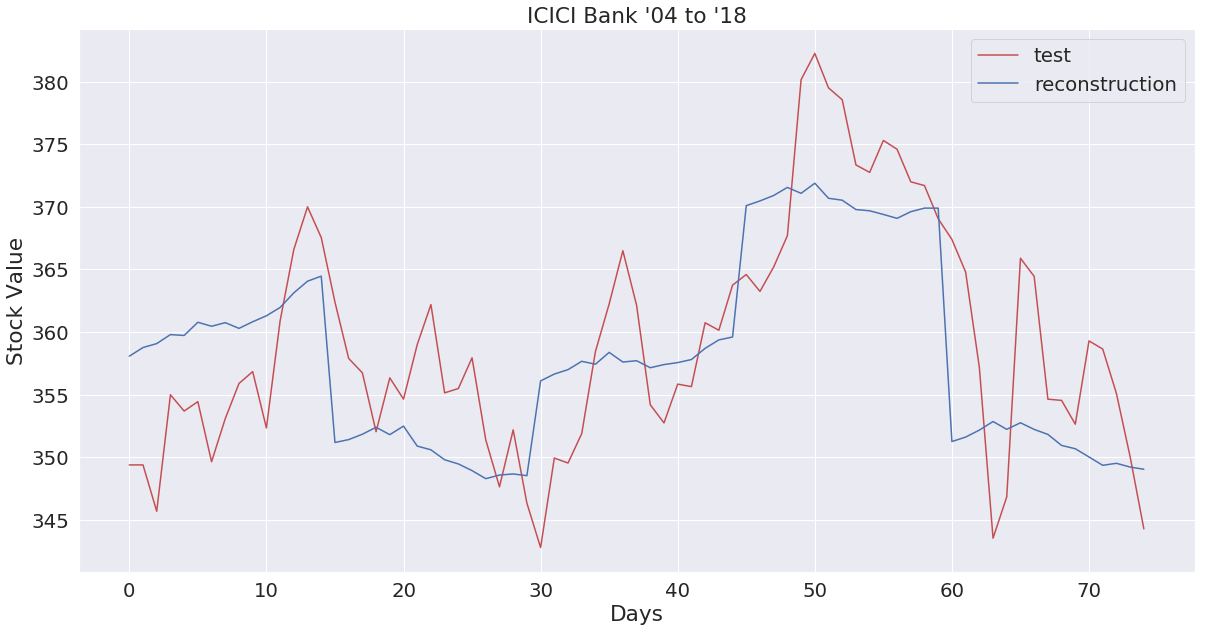

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.8)
plt.figure(figsize=(20,10))
plt.plot(stock_prices_test.ravel(), 'r', label = 'test')
plt.plot(reconstruct.ravel(), 'b', label = 'reconstruction')
plt.xlabel('Days')
plt.ylabel('Stock Value')
plt.title("ICICI Bank '04 to '18")
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import r2_score
y_true = stock_prices
y_pred = reconstruct
r2_score(y_true, y_pred,
         multioutput='variance_weighted') 

0.99116557428293239

In [63]:
from sklearn.metrics import mean_squared_error
y_true = stock_prices
y_pred = reconstruct
mean_squared_error(y_true, y_pred)

49.351241881888242